<h1>Exploration of HBM data</h1>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats 
from pandas.plotting import scatter_matrix
import seaborn
import numpy as np
import math

In [3]:
path="summary_hbm.txt"
cfsdata = pd.read_csv(path,sep='\t',dtype='object')
cfsdata=cfsdata.infer_objects()
cfsdata.head()
cfsdata["Sig. Sex"]=pd.to_numeric(cfsdata["Sig. Sex"])
cfsdata["Sig. Gene Expression"]=pd.to_numeric(cfsdata["Sig. Gene Expression"])
cfsdata.dtypes

Event                    object
Gene                     object
Sig. RBPs                object
Sig. Gene Expression    float64
Sig. Sex                float64
Tissue                   object
Dimorphic                object
dtype: object

In [4]:
cfsdata.head()

,Event,Gene,Sig. RBPs,Sig. Gene Expression,Sig. Sex,Tissue,Dimorphic
0,21228,TANK,"CNOT4(-0.21),CPEB2(-0.11),DAZAP1(-0.14),ENOX1(...",0.29,0.16,Heart - Left Ventricle,No
1,28196,UBE2E1,"FXR1(-0.16),FXR2(-0.19),HNRNPA2B1(0.19),IGF2BP...",0.68,0.00,Heart - Left Ventricle,No
2,21473,TMEM222,"ANKHD1(-0.23),DAZAP1(0.24),FMR1(-0.16),FXR2(-0...",0.37,-0.07,Heart - Left Ventricle,No
3,13601,SEC11A,"A1CF(-0.02),CPEB4(-0.06),FUS(0.12),FXR2(-0.26)...",0.65,0.00,Heart - Left Ventricle,No
4,4877,DEF8,"ANKHD1(-0.27),DAZAP1(-0.25),FXR1(-0.28),G3BP2(...",0.15,0.00,Heart - Left Ventricle,No


In [5]:
float(len(cfsdata[(cfsdata["Sig. Gene Expression"]!=0) & (cfsdata["Dimorphic"]=='Yes')]))/len(cfsdata[ (cfsdata["Dimorphic"]=='Yes')])

0.6774193548387096

<h2>Number of dimorphic vs 'variable' events</h2>
<p>The two groups should be equal in number. Yes=identified as having a sexually dimorphic ASE in the 'simple' regression.</p>

In [6]:
cfsdata["Dimorphic"].value_counts()

Yes    341
No     341
Name: Dimorphic, dtype: int64

<h2>Number of events according to tissue</h2>
<p>We took up the 100 significant dimrophic ASEs per tissue as well as an equal number of highly variable events that were not dimorphic. Therefore, the maximum number of events per tissue is 200.</p>

In [7]:
cfsdata["Tissue"].value_counts()

Brain - Cortex.Brain - Frontal Cortex (BA9).Brain - Anterior cingulate cortex (BA24)    200
Heart - Left Ventricle                                                                  200
Breast - Mammary Tissue                                                                 200
Thyroid                                                                                  48
Artery - Aorta                                                                           34
Name: Tissue, dtype: int64

<h2>Plot distribution of coefficients for sex</h2>

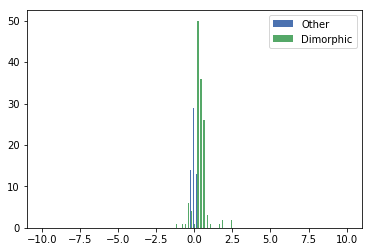

In [8]:
#cfsdata["Sig. Sex"].value_counts()

plt.style.use('seaborn-deep')

x = cfsdata["Sig. Sex"][cfsdata['Dimorphic'] == 'No'].tolist()
y = cfsdata["Sig. Sex"][cfsdata['Dimorphic'] == 'Yes'].tolist()
bins = np.linspace(-10, 10, 100)
plt.hist([[a for a in x if a!=0], [b for b in y if b!=0]], bins, label=['Other', 'Dimorphic'])
plt.legend(loc='upper right')
plt.show()

<h2>Coefficients for gene expression</h2>

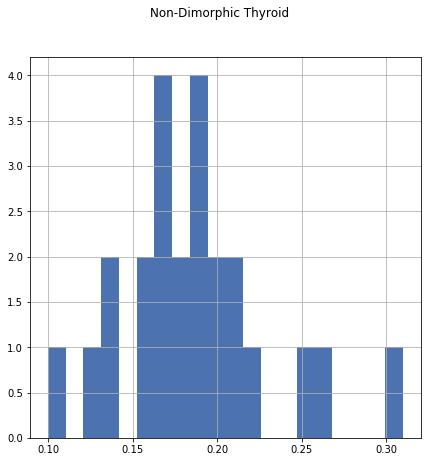

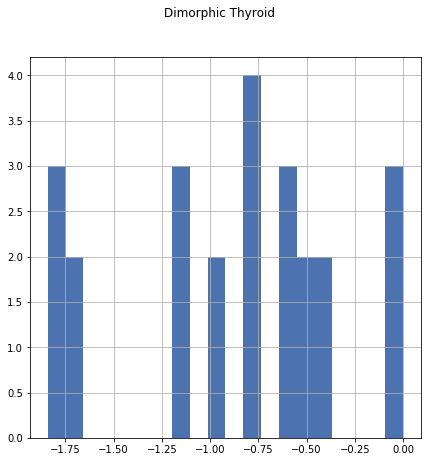

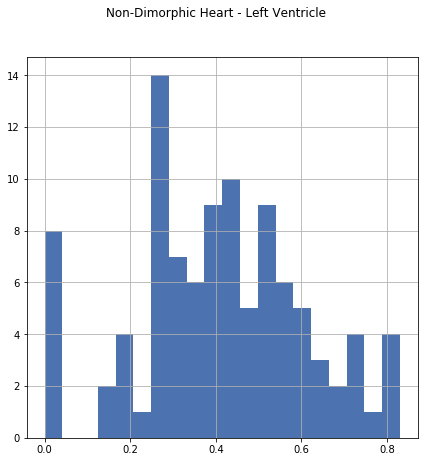

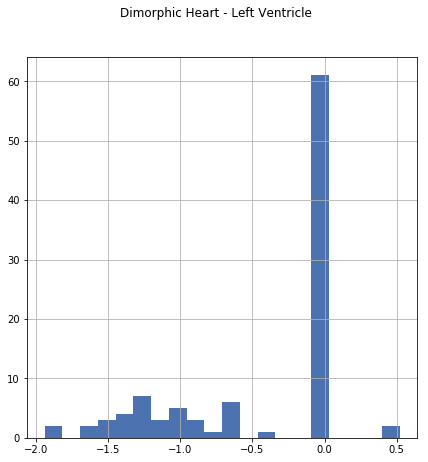

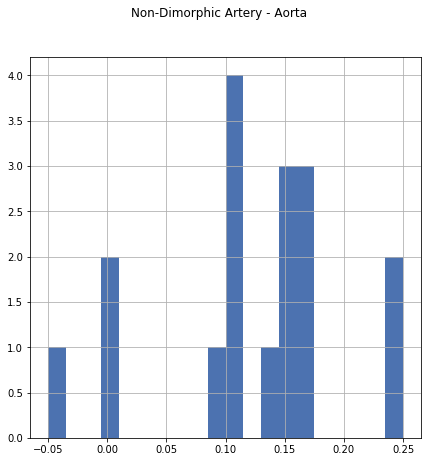

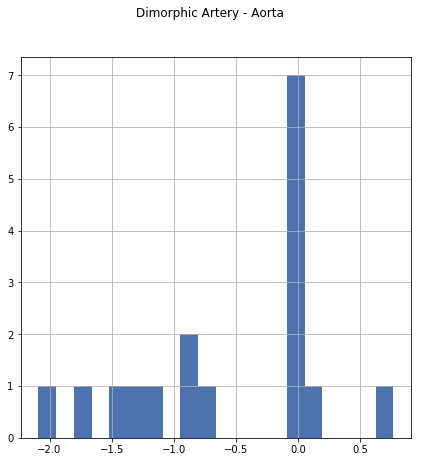

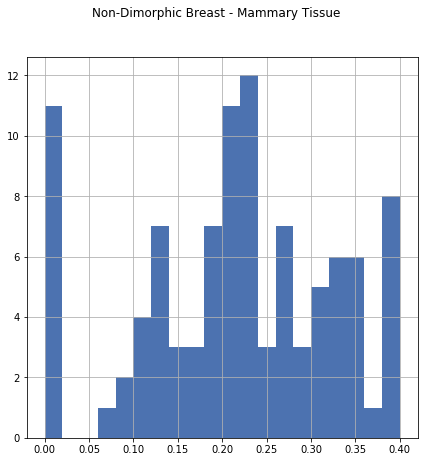

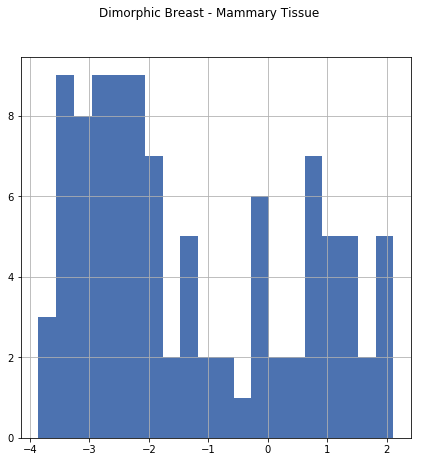

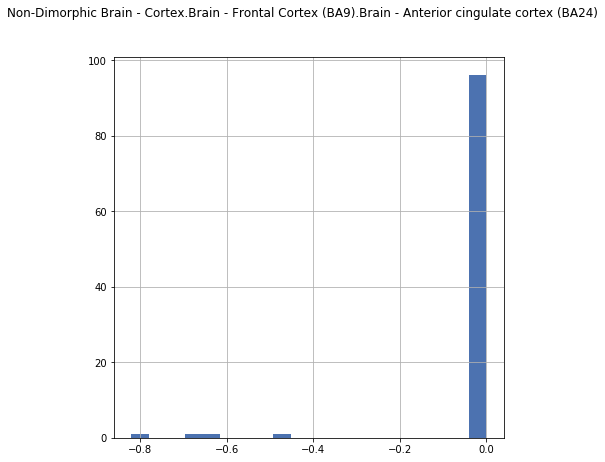

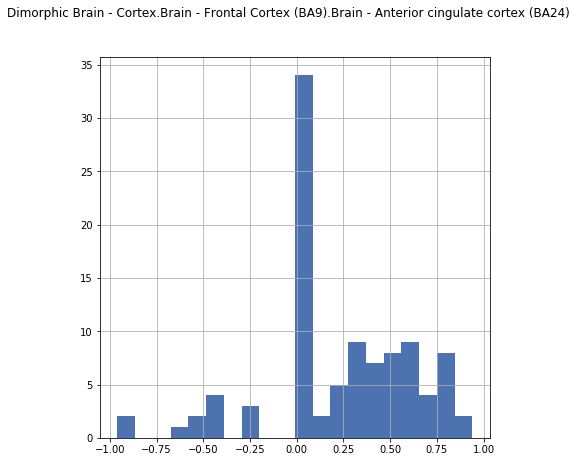

In [9]:
for tissue in set(cfsdata["Tissue"]):

    fig, ax = plt.subplots(1,1)
    h1=cfsdata[(cfsdata['Dimorphic'] == 'No') & (cfsdata['Tissue']==tissue)]["Sig. Gene Expression"].hist(bins=20,figsize=(7,7))
    plt.suptitle('Non-Dimorphic '+tissue)
    fig, ax = plt.subplots(1,1)
    h2=cfsdata[(cfsdata['Dimorphic'] == 'Yes') & (cfsdata['Tissue']==tissue)]["Sig. Gene Expression"].hist(bins=20,figsize=(7,7))
    plt.suptitle('Dimorphic '+tissue)
    plt.show()





<h2>Explore correlations between the number of RBPs and the gene expression etc.</h2>
<p>The following code is ugly and untested but wants to parse out the RBPs into a python dict with key=RBP name and value=coefficient. We need to test is RBP is a string in order to avoid empty strings.</p>

In [10]:
import numpy as np
import math
import pprint as pp
                    
tissue='Breast - Mammary Tissue'

n_rows=len(cfsdata[(cfsdata['Dimorphic'] == 'Yes') & (cfsdata['Tissue']==tissue)].index)
df = pd.DataFrame(index=np.arange(0, n_rows), columns=('Reg', 'Expression') )
row=0



for line in cfsdata[(cfsdata['Dimorphic'] == 'Yes') &(cfsdata['Tissue']==tissue)].iterrows():
    RBP= line[1][2]
    #Qprint ("RBP type",type(RBP)) -- always "str"
    expression = line[1][3]
    #print (line[1][1])
    reg_effects=0
    try:
        if (type(RBP) is str):
            #print ("ELSE RBP type",type(RBP))
            a=RBP.split(',')
            for r in a:
                i=r.index('(')
                j=r.index(')')
                rbp=r[:i]
                posterior_mean=float(r[i+1:j])
                #print("r",r,"rbp",rbp,"score",hdi)
              
                reg_effects+=abs(posterior_mean)
    except Exception as e:
        print(e, "RBP=",RBP, "line=",line)
    df.loc[row]=[reg_effects,expression]
    row=row+1
  
df.head()



,Reg,Expression
0,3.3,0.82
1,0,-3.52
2,0,-3.32
3,0,-3.48
4,0,-2.84


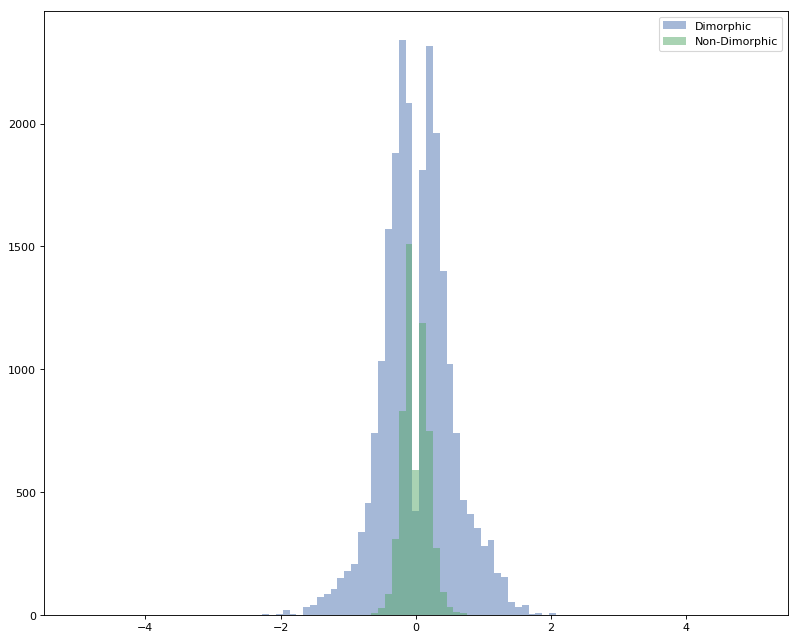

Ks_2sampResult(statistic=0.24411343854951006, pvalue=1.4881834458494446e-239)


In [20]:
import numpy as np
import math
import pprint as pp




df_dim = pd.DataFrame(columns=('RBP', 'Coef') )

row=0
  
for tissue in set(cfsdata['Tissue']):

    for line in cfsdata[(cfsdata['Dimorphic'] == 'Yes') ].iterrows():
        RBP= line[1][2]
        #Qprint ("RBP type",type(RBP)) -- always "str"
        expression = line[1][3]
        #print (line[1][1])
        reg_effects=0
        try:
            if (type(RBP) is str):
                #print ("ELSE RBP type",type(RBP))
                a=RBP.split(',')
                for r in a:
                    i=r.index('(')
                    j=r.index(')')
                    rbp=r[:i]
                    posterior_mean=float(r[i+1:j])
                    #print("r",r,"rbp",rbp,"score",hdi)
                    df_dim.loc[row]=[RBP,posterior_mean]
                    row=row+1
                    reg_effects+=abs(posterior_mean)
                     
        except Exception as e:
            print(e, "RBP=",RBP, "line=",line)
       


    
   
df_non_dim = pd.DataFrame(columns=('RBP', 'Coef') )

row=0
  
for tissue in set(cfsdata['Tissue']):

    for line in cfsdata[(cfsdata['Dimorphic'] == 'No') &(cfsdata['Tissue']==tissue)].iterrows():
        RBP= line[1][2]
        #Qprint ("RBP type",type(RBP)) -- always "str"
        expression = line[1][3]
        #print (line[1][1])
        reg_effects=0
        try:
            if (type(RBP) is str):
                #print ("ELSE RBP type",type(RBP))
                a=RBP.split(',')
                for r in a:
                    i=r.index('(')
                    j=r.index(')')
                    rbp=r[:i]
                    posterior_mean=float(r[i+1:j])
                    #print("r",r,"rbp",rbp,"score",hdi)

                    df_non_dim.loc[row]=[RBP,posterior_mean]
                    row=row+1
        except Exception as e:
            print(e, "RBP=",RBP, "line=",line)
        
        

        
x = [a for a in np.array(df_dim['Coef'])]
y = [b for b in np.array(df_non_dim['Coef'])]

import matplotlib.pyplot as pyplot
from matplotlib.pyplot import figure
import numpy as np
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
bins = np.linspace(-5, 5, 100)

pyplot.hist(x, bins, alpha=0.5, label='Dimorphic')
pyplot.hist(y, bins, alpha=0.5, label='Non-Dimorphic')
pyplot.legend(loc='upper right')
pyplot.show()
plt.savefig('/Users/karleg/Dimorph/RData/figure3e.eps')


print scipy.stats.ks_2samp(x,y)
    
    
    
    

In [12]:
import numpy as np
import math
import pprint as pp

rbp_dict={}

for tissue in set(cfsdata["Tissue"]):

    n_rows=len(cfsdata[(cfsdata['Dimorphic'] == 'Yes') & (cfsdata['Tissue']==tissue)].index)
    df = pd.DataFrame(index=np.arange(0, n_rows), columns=('Reg', 'Expression') )
    row=0

    for line in cfsdata[(cfsdata['Dimorphic'] == 'Yes') &(cfsdata['Tissue']==tissue)].iterrows():
        RBP= line[1][2]
        #Qprint ("RBP type",type(RBP)) -- always "str"
        expression = line[1][3]
        #print (line[1][1])
        reg_effects=0
        try:
            if (type(RBP) is str):
                #print ("ELSE RBP type",type(RBP))
                a=RBP.split(',')
                for r in a:
                    i=r.index('(')
                    j=r.index(')')
                    rbp=r[:i]
                    posterior_mean=float(r[i+1:j])
                    #print("r",r,"rbp",rbp,"score",hdi)
                    if rbp in rbp_dict.keys():

                        rbp_dict[rbp]+=abs(posterior_mean)
                    else:
                      
                        rbp_dict[rbp]=abs(posterior_mean)

                    reg_effects+=abs(posterior_mean)
                    
        except Exception as e:
            print(e, "RBP=",RBP, "line=",line)
        df.loc[row]=[reg_effects,expression]
        row=row+1




import csv

with open("output.tsv", "w") as csvfile:
    
    writer = csv.writer(csvfile, dialect="excel-tab")
    
    for rbp, effect in rbp_dict.items():
        
        writer.writerow((rbp ,effect))


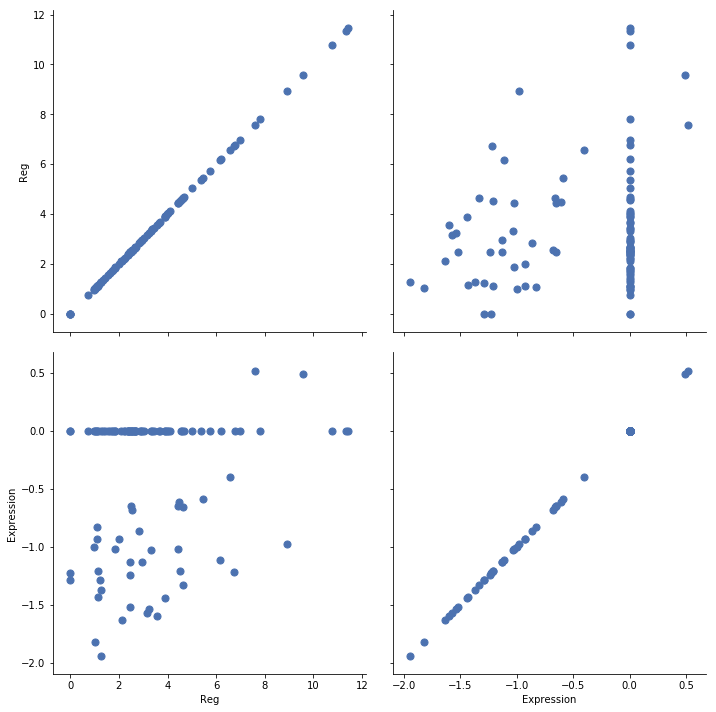

In [13]:
import numpy as np
import math
import pprint as pp

tissue='Heart - Left Ventricle'

n_rows=len(cfsdata[(cfsdata['Dimorphic'] == 'Yes') & (cfsdata['Tissue']==tissue)].index)
df = pd.DataFrame(index=np.arange(0, n_rows), columns=('Reg', 'Expression') )
row=0



for line in cfsdata[(cfsdata['Dimorphic'] == 'Yes') &(cfsdata['Tissue']==tissue)].iterrows():
    RBP= line[1][2]
    #Qprint ("RBP type",type(RBP)) -- always "str"
    expression = line[1][3]
    #print (line[1][1])
    reg_effects=0
    try:
        if (type(RBP) is str):
            #print ("ELSE RBP type",type(RBP))
            a=RBP.split(',')
            for r in a:
                i=r.index('(')
                j=r.index(')')
                rbp=r[:i]
                posterior_mean=float(r[i+1:j])
                #print("r",r,"rbp",rbp,"score",hdi)
              
                reg_effects+=abs(posterior_mean)
    except Exception as e:
        print(e, "RBP=",RBP, "line=",line)
    df.loc[row]=[reg_effects,expression]
    row=row+1
  
X=df[["Reg","Expression"]]
cm=X.corr()
cm
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.PairGrid(X,vars=["Reg","Expression"],size=5)
g.map(plt.scatter,s=50)

plt.savefig('/Users/karleg/Dimorph/RData/figure4a.eps')


In [14]:
from scipy.stats.stats import pearsonr
X=df[["Reg","Expression"]]
X=X[X['Expression'] != 0]
pearsonr([float(x) for x in X['Expression'].values],[float(y) for y in X['Reg'].values])    
       

(0.5890634130416097, 7.974745397319678e-05)

<h2>Correlation Plots</h2>

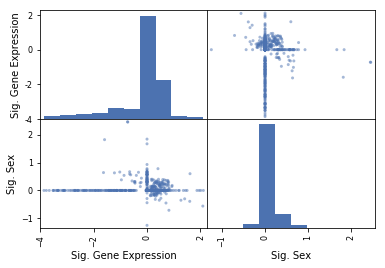

In [15]:
X=cfsdata[["Sig. Gene Expression","Sig. Sex"]]
sm=scatter_matrix(X)

In [16]:
RBP=cfsdata[["Sig. RBPs"]]

In [17]:
for row in RBP.iterrows():
    rbp=row[1]
    a=rbp.str.split()
    